In [1]:
from basic_ops import *
from expected_outcom import *

In [2]:
qc=initialize(3)

In [3]:
qc.draw()

┌─────────┐
q_0: ┤ RX(π/2) ├
     ├─────────┤
q_1: ┤ RX(π/2) ├
     ├─────────┤
q_2: ┤ RX(π/2) ├
     ├─────────┤
q_3: ┤ RX(π/2) ├
     ├─────────┤
q_4: ┤ RX(π/2) ├
     ├─────────┤
q_5: ┤ RX(π/2) ├
     ├─────────┤
q_6: ┤ RX(π/2) ├
     ├─────────┤
q_7: ┤ RX(π/2) ├
     ├─────────┤
q_8: ┤ RX(π/2) ├
     └─────────┘
c: 9/═══════════

In [4]:
qc=add_cnot(qc,7,8)
qc.draw()

┌─────────┐     
q_0: ┤ RX(π/2) ├─────
     ├─────────┤     
q_1: ┤ RX(π/2) ├─────
     ├─────────┤     
q_2: ┤ RX(π/2) ├─────
     ├─────────┤     
q_3: ┤ RX(π/2) ├─────
     ├─────────┤     
q_4: ┤ RX(π/2) ├─────
     ├─────────┤     
q_5: ┤ RX(π/2) ├─────
     ├─────────┤     
q_6: ┤ RX(π/2) ├─────
     ├─────────┤     
q_7: ┤ RX(π/2) ├──■──
     ├─────────┤┌─┴─┐
q_8: ┤ RX(π/2) ├┤ X ├
     └─────────┘└───┘
c: 9/════════════════

In [5]:
qc=add_rx(qc,1,6)
qc.draw()

┌─────────┐           
q_0: ┤ RX(π/2) ├───────────
     ├─────────┤           
q_1: ┤ RX(π/2) ├───────────
     ├─────────┤           
q_2: ┤ RX(π/2) ├───────────
     ├─────────┤           
q_3: ┤ RX(π/2) ├───────────
     ├─────────┤           
q_4: ┤ RX(π/2) ├───────────
     ├─────────┤           
q_5: ┤ RX(π/2) ├───────────
     ├─────────┤┌─────────┐
q_6: ┤ RX(π/2) ├┤ RX(π/2) ├
     ├─────────┤└─────────┘
q_7: ┤ RX(π/2) ├─────■─────
     ├─────────┤   ┌─┴─┐   
q_8: ┤ RX(π/2) ├───┤ X ├───
     └─────────┘   └───┘   
c: 9/══════════════════════

In [6]:
qc=add_rx(qc,0,5)
qc.draw()

┌─────────┐            
q_0: ┤ RX(π/2) ├────────────
     ├─────────┤            
q_1: ┤ RX(π/2) ├────────────
     ├─────────┤            
q_2: ┤ RX(π/2) ├────────────
     ├─────────┤            
q_3: ┤ RX(π/2) ├────────────
     ├─────────┤            
q_4: ┤ RX(π/2) ├────────────
     ├─────────┤┌──────────┐
q_5: ┤ RX(π/2) ├┤ RX(-π/2) ├
     ├─────────┤├─────────┬┘
q_6: ┤ RX(π/2) ├┤ RX(π/2) ├─
     ├─────────┤└─────────┘ 
q_7: ┤ RX(π/2) ├─────■──────
     ├─────────┤   ┌─┴─┐    
q_8: ┤ RX(π/2) ├───┤ X ├────
     └─────────┘   └───┘    
c: 9/═══════════════════════

In [18]:
qc=add_measurement(qc,3)

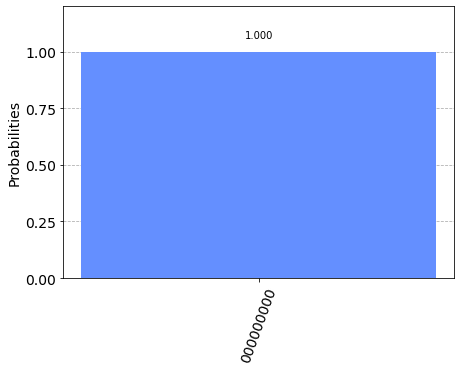

In [9]:
# Get an IonQ simulator backend to run circuits on:
backend = provider.get_backend("ionq_simulator")

# Then run the circuit:
job = backend.run(qc, shots=1000)

#save job_id
job_id_trial = job.job_id()

# Fetch the result:
result = job.result()
# histogram
plot_histogram(result.get_counts())

In [18]:
expected_outcome(qc)

[0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.0, nan, nan]

In [21]:
qc.ry(-math.pi/2.,3)
qc.draw()

┌───┐                                                            »
q_0: ┤ H ├────────────────────────────────────────────────────────────»
     ├───┤                                                            »
q_1: ┤ H ├────────────────────────────────────────────────────────────»
     ├───┤                                                            »
q_2: ┤ H ├────────────────────────────────────────────────────────────»
     ├───┤┌─────────┐ ┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_3: ┤ H ├┤ RY(π/2) ├─┤ RY(-π/2) ├┤ RY(-π/2) ├┤ RY(-π/2) ├┤ RY(-π/2) ├»
     ├───┤├─────────┤ ├─────────┬┘└──────────┘└──────────┘└──────────┘»
q_4: ┤ H ├┤ RY(π/2) ├─┤ RY(π/2) ├─────────────────────────────────────»
     ├───┤├─────────┴┐└─────────┘                                     »
q_5: ┤ H ├┤ RX(-π/2) ├────────────────────────────────────────────────»
     ├───┤├─────────┬┘                                                »
q_6: ┤ H ├┤ RX(π/2) ├─────────────────────────────────────────────────»
     ├───┤└─────────┘                                                 »
q_7: ┤ H ├─────■──────────────────────────────────────────────────────»
     ├───┤   ┌─┴─┐                                                    »
q_8: ┤ H ├───┤ X ├────────────────────────────────────────────────────»
     └───┘   └───┘                                                    »
c: 9/═════════════════════════════════════════════════════════════════»
                                                                      »
«                 
«q_0: ────────────
«                 
«q_1: ────────────
«                 
«q_2: ────────────
«     ┌──────────┐
«q_3: ┤ RY(-π/2) ├
«     └──────────┘
«q_4: ────────────
«                 
«q_5: ────────────
«                 
«q_6: ────────────
«                 
«q_7: ────────────
«                 
«q_8: ────────────
«                 
«c: 9/════════════
«

In [19]:
def test_win(list): #return 0 for player 0 win, 1 for player 1 win, 2 for tie or neither wins
    win1=0
    win0=0
    if list[0]==list[1]==list[2]:
        if list[1]==1:
            win1+=1
        else:
            win0+=1
    if list[3]==list[4]==list[5]:
        if list[3]==1:
            win1+=1
        else:
            win0=1
    if list[6]==list[7]==list[8]:
        if list[6]==1:
            win1+=1
        else:
            win0+=1
    if list[0]==list[4]==list[8]:
        if list[0]==1:
            win1+=1
        else:
            win0+=1
    if list[2]==list[4]==list[6]:
        if list[2]==1:
            win1+=1
        else:
            win0=1
    if list[0]==list[3]==list[6]:
        if list[0]==1:
            win1+=1
        else:
            win0+=1
    if list[1]==list[4]==list[7]:
        if list[1]==1:
            win1+=1
        else:
            win0+=1
    if list[2]==list[5]==list[8]:
        if list[2]==1:
            win1+=1
        else:
            win0+=1
    print(win1)
    print(win0)
    if win1>win0:
        return 1
    elif win0>win1:
        return 0
    else:
        return 2
    

In [20]:
list=[1,1,1,0,0,0,0,0,0]
test_win(list)

1
2


0